# Want to Sell a Car?

_Author: Zeth De Luna &mdash; September 10, 2020_

In this project, we'll be practicing the basics of the machine learning workflow to predict a car's market price using its attributes. [The data set](https://archive.ics.uci.edu/ml/datasets/automobile) we'll be working with contains information on various cars, such as the motor's displacement, the weight of the car, the miles per gallon, etc. 

## Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
column_names= ['symboling', 'normalized_losses', 'make', 'fuel_type',
               'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
               'length', 'width', 'height', 'curb_weight',
               'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
               'bore', 'stroke', 'compression_ratio', 'horsepower',
               'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', header=None, names=column_names)

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Our goal for this project is to predict a car's market price. In terms of machine learning, this means that our target column should be the `price` column. The columns that we can use as features&mdash;car qualities we can use to determine the car's value&mdash;include all numeric columns. The non-numeric columns have values that we can't use to make quantifiable comparisons, so we'll get rid of those columns.

In [4]:
numeric_cols = ['normalized_losses', 'num_of_doors', 'wheel_base',
                'length', 'width', 'height', 'curb_weight',
                'num_of_cylinders', 'engine_size', 'bore', 'stroke',
                'compression_ratio', 'horsepower', 'peak_rpm',
                'city_mpg', 'highway_mpg', 'price']

cars_num = cars[numeric_cols].copy()

In [5]:
cars_num.head()

,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the Data
In the `normalized_losses` column, there are missing data represented by a `?`. The methods of predictive modeling that we'll be using will not work if our data has any missing values. So, we'll replace all `?` with `numpy.nan` missing values.

In [6]:
import numpy as np
# replace '?' with np.nan values
cars_num = cars_num.replace('?', np.nan)

In [7]:
cars_num.head()

,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


Next, we see that `num_of_doors` and `num_of_cylinders` have values that represnt numbers, however they are spelled out as strings, i.e. `two`, `four`, `six`, etc. Let's find out which "numbers" are present in those columns and replace them with numeric values.

In [8]:
cars_num['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [9]:
cars_num['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [10]:
def transform_number(number):
    '''A function that takes in a written number (two, four, six, etc.)
    and returns that number as an int (2, 4, 6, etc.).'''
    num_dict = {'two': 2,
                'three': 3,
                'four': 4,
                'five': 5,
                'six': 6,
                'eight': 8, 
                'twelve': 12}
    if number in num_dict:
        return num_dict[number]
    else:
        return np.nan
    
# apply the function to the two columns
cars_num['num_of_doors'] = (cars_num['num_of_doors']
                                .apply(transform_number)
                           )
cars_num['num_of_cylinders'] = (cars_num['num_of_cylinders']
                                   .apply(transform_number)
                               )

In [11]:
cars_num['num_of_doors'].value_counts(dropna=False)

4.0    114
2.0     89
NaN      2
Name: num_of_doors, dtype: int64

In [12]:
cars_num['num_of_cylinders'].value_counts(dropna=False)

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_of_cylinders, dtype: int64

In [13]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    object 
 1   num_of_doors       203 non-null    float64
 2   wheel_base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb_weight        205 non-null    int64  
 7   num_of_cylinders   205 non-null    int64  
 8   engine_size        205 non-null    int64  
 9   bore               201 non-null    object 
 10  stroke             201 non-null    object 
 11  compression_ratio  205 non-null    float64
 12  horsepower         203 non-null    object 
 13  peak_rpm           203 non-null    object 
 14  city_mpg           205 non-null    int64  
 15  highway_mpg        205 non-null    int64  
 16  price              201 non

Although our entire data set consists of either numbers or `NaN` values, some of them are stored as strings. To make the data more useful, we'll convert everything to a `float` type.

In [14]:
cars_num = cars_num.astype(float)

Now, let's figure out what to do with the missing values.

In [15]:
cars_num.isnull().sum()

normalized_losses    41
num_of_doors          2
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_of_cylinders      0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Since `price` is the column that we want to predict and it's only missing a few values, let's remove the rows that do not have a price value.

In [16]:
# drop rows with a missing price
cars_num.dropna(subset=['price'], inplace=True)

In [17]:
cars_num.isnull().sum()

normalized_losses    37
num_of_doors          2
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_of_cylinders      0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

There are a few other columns that have some missing values that we could probably remove, but we'd risk losing too much data. So, what we can do is fill those missing values with the averages of those columns.

In [18]:
# fill null values with column averages
cars_num.fillna(cars_num.mean(), inplace=True)

In [19]:
cars_num.isnull().sum()

normalized_losses    0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Finally, to avoid large errors when making calculations we can normalize each column to range from 0 to 1, except for the target column (`price`).

In [20]:
target_col = cars_num['price'].copy()
cars_num = (cars_num - cars_num.min()) / (cars_num.max() - cars_num.min())
cars_num['price'] = target_col

In [21]:
cars_num.head()

,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [22]:
cars_num.isnull().sum()

normalized_losses    0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## k-Nearest Neighbors Prediction Models
### Univariate Model
We'll begin our predictions using simple prediction models before moving on to more complex models. This way, we can structure our code workflow and understand the features better.

First, we'll create a function, called `knn_train_test()` that encapsulates the training and simple validation process. The function will take in 3 parameters&mdash;training column(s), target column, the dataframe, and the k-value (number of neighbors)&mdash; and will perform the following:
* Split the data set into a training and test set.
* Instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
* Calculate and return the Root-Mean-Squared-Error (RMSE) value

Then, we'll use the function to train and test univariate models using the different numeric columns in the data set.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, df, k=5):
    '''Parameters:
            train_col: expects column names as a list of strings
            test_col: expects a single column name as a string
            df: dataframe
            k: for k-nearest neighbors, default=5'''
    # randomize the data set
    np.random.seed(2)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # split the data into a training and test set
    df_split = int(df.shape[0] / 2)
    train_set = df.iloc[:df_split]
    test_set = df.iloc[df_split:]
    
    # instantiate KNeighborsRegressor class and make predictions
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[features], train_set[target])
    predictions = model.predict(test_set[features])
    mse = mean_squared_error(test_set[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

Now, we'll use this function to train and test univariate models using the different numeric columns in our data set.

In [24]:
# establish features and target
feature_names = cars_num.columns.drop('price')
target_name = 'price'

# create dictionary containing rmse result for each feature 
rmse_per_feat = {}
for feat in feature_names: # using default k=5
    rmse_per_feat[feat] = knn_train_test([feat], target_name, cars_num)

# transform dict to pandas Series and sort by values
rmse_per_feat = pd.Series(rmse_per_feat)
rmse_per_feat.sort_values()

engine_size          4204.450923
curb_weight          4423.567553
highway_mpg          4524.912704
horsepower           4690.439958
width                5224.489949
city_mpg             5371.994068
length               5860.888868
num_of_cylinders     5996.065679
compression_ratio    7052.367117
bore                 7179.265101
wheel_base           7365.198823
normalized_losses    8094.531252
stroke               8186.552629
peak_rpm             8543.527987
height               8636.862459
num_of_doors         9111.718143
dtype: float64

Using the default number of nearest neighbors (k = 5) and training our prediction model with only one feature at a time, we found that `engine_size` results in the lowest (best) RMSE.

We'll perform the predictions again, but this time we'll vary the k values (using 1, 3, 5, 7, and 9) and see which pair of feature and k-value performed the best.

In [25]:
# establish features and target
feature_names = cars_num.columns.drop('price')
target_name = 'price'

# create dictionary within a dictionary {feature: {k-value: rmse}}
rmse_results = {}
for feat in feature_names:
    k_results = {}
    for i in range(1, 10, 2):
        rmse = knn_train_test([feat], target_name, cars_num, k=i)
        k_results[i] = rmse
    rmse_results[feat] = k_results
    
rmse_results

{'normalized_losses': {1: 9962.792797043994,
  3: 9019.619227728037,
  5: 8094.531252054997,
  7: 8695.675658336206,
  9: 8530.521880852983},
 'num_of_doors': {1: 9569.146140664074,
  3: 10323.964897650552,
  5: 9111.718143486258,
  7: 8813.608759235967,
  9: 8691.285283650474},
 'wheel_base': {1: 7190.166713389658,
  3: 7275.724958302566,
  5: 7365.198822909678,
  7: 7391.6830470559935,
  9: 7418.516692786961},
 'length': {1: 5451.514139745175,
  3: 5626.958100159099,
  5: 5860.888868213128,
  7: 6152.910698625953,
  9: 6258.300157784935},
 'width': {1: 5733.67839442474,
  3: 5067.598634540041,
  5: 5224.489948708717,
  7: 5372.091555957795,
  9: 5426.896494952097},
 'height': {1: 8779.288411927357,
  3: 8682.607261346413,
  5: 8636.862458802805,
  7: 8537.302578912371,
  9: 8603.672388492741},
 'curb_weight': {1: 5320.150762771094,
  3: 4456.515695609578,
  5: 4423.567552808188,
  7: 4566.233938320572,
  9: 4913.234299086159},
 'num_of_cylinders': {1: 5642.003774729277,
  3: 5704.442

This is quite a bit of information for the human mind to take in. Let's make things easier by creating a visualization of the data.

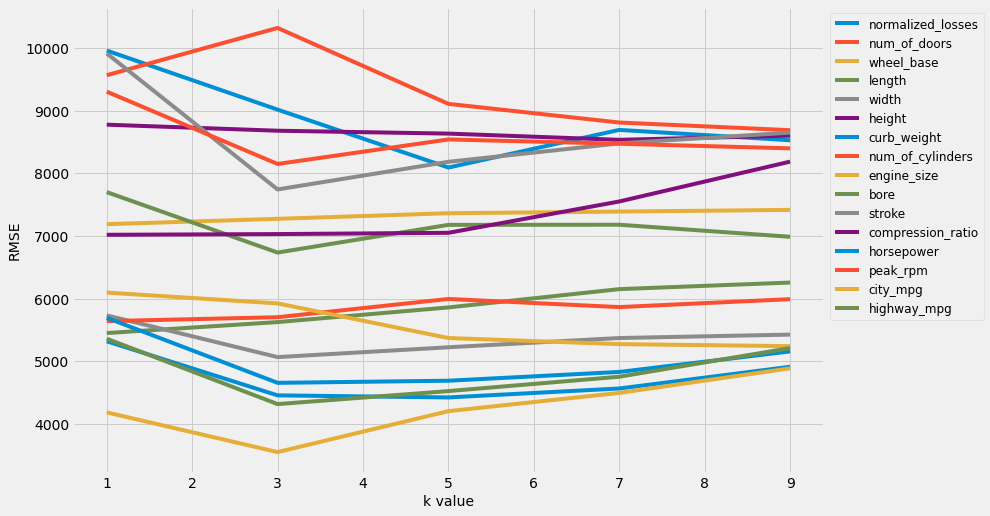

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

for feature, k in rmse_results.items():
    x = list(k.keys())
    y = list(k.values())
    plt.plot(x, y, label=feature)
    plt.xlabel('k value', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(bbox_to_anchor=(1,1), fontsize=12)

The best-performing feature is still `engine_size`, but what's worth noting from the plot above is that many of the features performed best when the k-value (number of nearest neighbors) was set at k = 3.

### Multivariate Model
Looking at how each feature independently affects the pricing of a car gives us good insight for predicting a car's market value. However, more often than not, a car's value is determined by a collection of multiple features. For instance, large SUVs tend to be more expensive than small compact sedans, meaning that a car's size can have an affect on its market value. If we were to predict a car's price based on its size, we would need to consider at least `length`, `width`, and `height`&mdash;one could argue about including `wheel_base` or `curb_weight`.

Luckily, our `knn_train_test()` function that we created earlier was built to accept multiple features. Below, we'll investigate how the number of features passed into the model will affect its performance.

We'll pass the following features into the prediction model using the default k value:
* Best 2 features: `[engine_size, curb_weight]`
* Best 3 features: `[engine_size, curb_weight, highway_mpg]`
* Best 4 features: `[engine_size, curb_weight, highway_mpg, horsepower]`
* Best 5 features: `[engine_size, curb_weight, highway_mpg, horsepower, width]`

In [27]:
feats = ['engine_size', 'curb_weight', 'highway_mpg',
         'horsepower', 'width']
targ = 'price'

rmse_results = {}
for i in range(2,6):
    feat = feats[:i]
    rmse = knn_train_test(feat, targ, cars_num)
    key = 'Best {} Features'.format(i)
    rmse_results[key] = rmse
    
rmse_results

{'Best 2 Features': 4481.822268755519,
 'Best 3 Features': 4416.455933828112,
 'Best 4 Features': 4785.522842536188,
 'Best 5 Features': 4367.216085361202}

The results above show now clear relationship between the number of features used and the resulting RMSE value. Let's include more features to see if we can find any relationships.

Text(0, 0.5, 'RMSE')

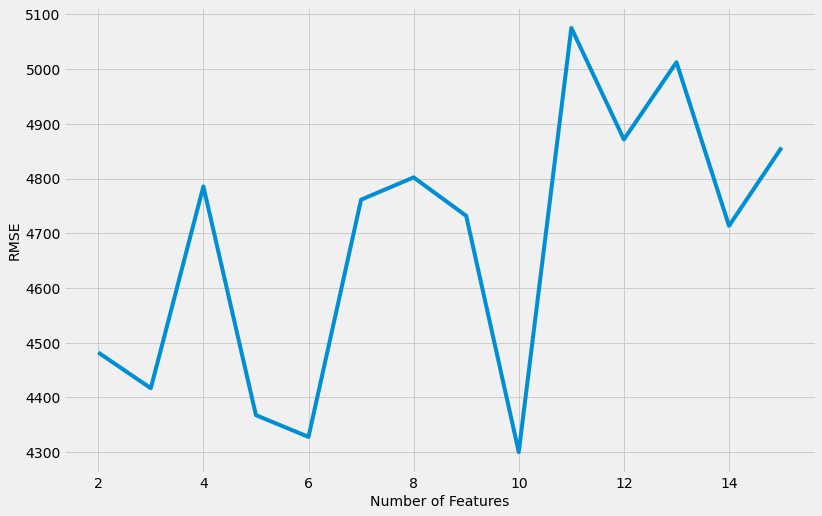

In [28]:
feats = list(rmse_per_feat.sort_values().index)
targ = 'price'

rmse_results = {}
for i in range(2,len(feats)):
    feat = feats[:i]
    rmse = knn_train_test(feat, targ, cars_num)
    key = 'Best {} Features'.format(i)
    rmse_results[key] = rmse
    
x = range(2, len(feats))
y = list(rmse_results.values())

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

The results show that the best number of features to use is 10 features, followed by 6 features. However, the graph shows no relationship between the number of features used and the model's performance.

### Model Tuning
Using the default k-vale (k = 5), we found that the top 3 performing models trained using:
1. The best 10 features
2. The best 6 features
3. The best 5 features

To fine tune our model, we'll take the three models above and perform predictions again while varying the k-value from 1 to 25. Then, we'll observe the results and determine the best k-value for each model.

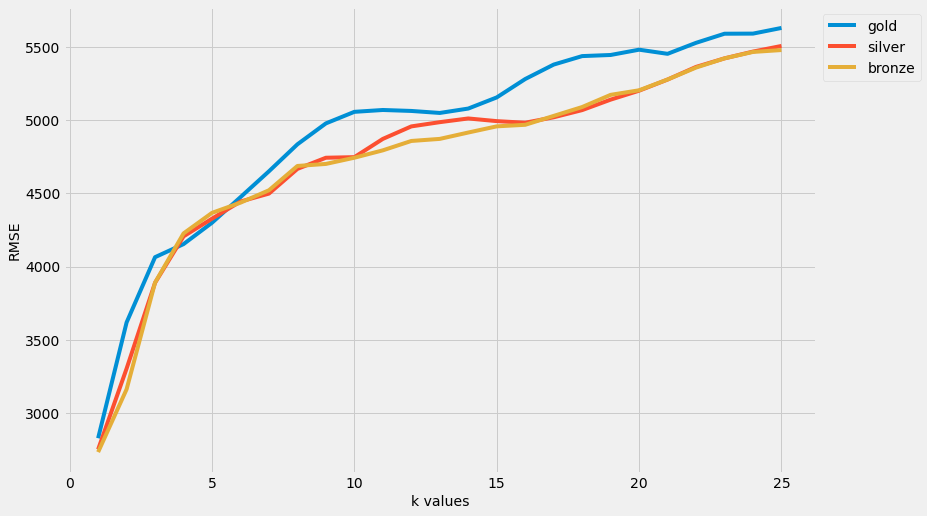

In [29]:
# establish input features
top_features = list(rmse_per_feat.sort_values().index)
top_3_models = {'gold': top_features[:10],
                'silver': top_features[:6],
                'bronze': top_features[:5]}

top_3_results = {}
for model in top_3_models.items():
    k_results = {}
    for i in range(1,26):
        rmse = knn_train_test(list(model[1]), 'price', cars_num, k=i)
        k_results[i] = rmse
    top_3_results[model[0]] = k_results
    
    
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

for model, k in top_3_results.items():
    x = list(k.keys())
    y = list(k.values())
    plt.plot(x, y, label=model)
    plt.xlabel('k values', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))

The results show that the optimal k-value for each model is `k = 1`.

## Applying Our Findings
Now that we know that passing the top 10 features and a k-value of 1 into our prediction model will get the best results, let's apply this to the data and get the predicted market value for each car.

## Conclusions
In this project, we implemented a simple test/train validation model to predict the market value for a list of cars. We found that for our model to achieve the best results, we should pass the top 10 features into the model with a k-value of 1. We can now use this model to predict the market value for a car!